Population Density

In [253]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [258]:
# Load in csv

bees_df = pd.read_csv("bees_new_2.csv")

pop_est_df = pd.read_csv("pop_est_clean.csv")

land_area_df = pd.read_csv("land_area.csv")

bee_loss_df = pd.read_csv("bees_prior.csv") 

abbr_name_df = pd.read_csv("abbr-name.csv", header=None)
abbr_name_df = abbr_name_df.rename(columns={0:"State_Abb", 1:"State"})

# Population dataset

In [189]:
pop_est_df =pop_est_df.rename(columns={'NAME':'State'})
pop_est_df.head()

,State,CENSUS2010POP,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,Alabama,4779736,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,Alaska,710231,722038,730399,737045,736307,737547,741504,739786,737438
2,Arizona,6392017,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
3,Arkansas,2915918,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
4,California,37253956,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [190]:
pop_est_df = pd.merge(abbr_name_df, pop_est_df, on='State')
pop_est_df2 = pop_est_df
pop_est_df2 =pop_est_df2.drop(['State', 'CENSUS2010POP',
                             'POPESTIMATE2011','POPESTIMATE2012',
                            'POPESTIMATE2013','POPESTIMATE2014'], axis =1)

pop_est_df2 = pop_est_df2.rename(columns={'POPESTIMATE2015':2015,
                                                'POPESTIMATE2016':2016,
                                                'POPESTIMATE2017':2017,
                                                'POPESTIMATE2018':2018})

pop_est_df2 = pop_est_df2.set_index('State_Abb')
pop_est_df2_T = pop_est_df2.T


pop_est_df2_T.head()

State_Abb,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
2015,4853160,737547,6833596,2978407,38953142,5452107,3587509,941413,20224249,10181111,...,853933,6590808,27486814,2982497,625197,8362907,7163543,1841996,5761406,585668
2016,4864745,741504,6945452,2990410,39209127,5540921,3578674,949216,20629982,10304763,...,862890,6645011,27937492,3042613,623644,8410946,7294680,1830929,5772958,584290
2017,4875120,739786,7048876,3002997,39399349,5615902,3573880,957078,20976812,10413055,...,873286,6708794,28322717,3103118,624525,8465207,7425432,1817048,5792051,578934
2018,4887871,737438,7171646,3013825,39557045,5695564,3572665,967171,21299325,10519475,...,882235,6770010,28701845,3161105,626299,8517685,7535591,1805832,5813568,577737


In [192]:
pop_est_df2_sorted= pop_est_df2.sort_values(by=[2018], ascending=False)
pop_est_df2_sorted.head()

,2015,2016,2017,2018
State_Abb,,,,
CA,38953142,39209127,39399349,39557045
TX,27486814,27937492,28322717,28701845
FL,20224249,20629982,20976812,21299325
NY,19661411,19641589,19590719,19542209
PA,12785759,12783538,12790447,12807060


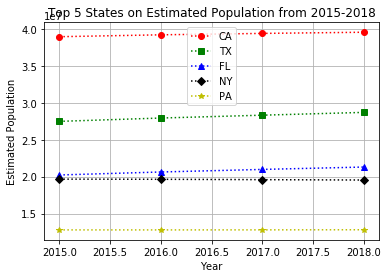

In [193]:
fig, ax7 = plt.subplots()
#mouse count
ax7.errorbar(pop_est_df2_T.index, pop_est_df2_T.CA, fmt="o:", color='r', label = 'CA')
ax7.errorbar(pop_est_df2_T.index, pop_est_df2_T.TX, fmt="s:", color='g', label = 'TX')
ax7.errorbar(pop_est_df2_T.index, pop_est_df2_T.FL, fmt="^:", color='b', label = 'FL')
ax7.errorbar(pop_est_df2_T.index, pop_est_df2_T.NY, fmt="D:", color='black', label = 'NY')
ax7.errorbar(pop_est_df2_T.index, pop_est_df2_T.PA, fmt="*:", color='y', label = 'PA')

ax7.legend(loc="best")
# ax7.set_xlim(2014, 2019)
# ax7.set_ylim(400, 1500)
ax7.set_title("Top 5 States on Estimated Population from 2015-2018")
ax7.set_xlabel("Year")
ax7.set_ylabel("Estimated Population")
ax7.grid()


# Save the Figure
plt.savefig('Top 5 States on Estimated Population.png')

plt.show()

# Population Density

In [194]:
#Create the DataFrame for the Population Density
pop_density_df = pd.DataFrame()
pop_density_df['State'] = pop_est_df['State']

In [195]:
#get the abbreviation of the states
pop_density_df = pd.merge(abbr_name_df, pop_density_df, on='State')
pop_density_df.head()

,State_Abb,State
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [196]:
#Calculate POpulation density
pop_density_values = pop_est_df[['POPESTIMATE2015','POPESTIMATE2016',
                                 'POPESTIMATE2017', 'POPESTIMATE2018']].div(land_area_df.Value,axis=0)

In [197]:
#Joing the abbreviations with the pop density df
pop_density_df = pop_density_df.join(pop_density_values)
pop_density_df.head()

,State_Abb,State,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,AL,Alabama,95.826407,96.055155,96.260011,96.511781
1,AK,Alaska,1.292489,1.299423,1.296412,1.292298
2,AZ,Arizona,60.158029,61.142729,62.053199,63.133977
3,AR,Arkansas,57.238004,57.468673,57.710566,57.918655
4,CA,California,250.053518,251.696773,252.917873,253.930178


In [198]:
pop_density_df = pop_density_df.rename(columns={'POPESTIMATE2015':2015,
                                                'POPESTIMATE2016':2016,
                                                'POPESTIMATE2017':2017,
                                                'POPESTIMATE2018':2018})

In [199]:
pop_density_df['Mean']= pop_density_df.mean(axis=1)

pop_density_df = pop_density_df.drop(['State'], axis =1)
pop_density_df.head()

,State_Abb,2015,2016,2017,2018,Mean
0,AL,95.826407,96.055155,96.260011,96.511781,96.163338
1,AK,1.292489,1.299423,1.296412,1.292298,1.295155
2,AZ,60.158029,61.142729,62.053199,63.133977,61.621983
3,AR,57.238004,57.468673,57.710566,57.918655,57.583974
4,CA,250.053518,251.696773,252.917873,253.930178,252.149585


In [200]:
pop_density_df2 = pop_density_df.drop(['Mean'], axis =1)
pop_density_df2= pop_density_df2.set_index('State_Abb')
pop_density_df_T = pop_density_df2.T
pop_density_df_T.head()

State_Abb,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
2015,95.826407,1.292489,60.158029,57.238004,250.053518,52.605245,740.859622,483.137631,377.143860,177.021269,...,11.263972,159.835673,105.220052,36.296833,67.833358,211.772295,107.794552,76.627835,106.381832,6.032022
2016,96.055155,1.299423,61.142729,57.468673,251.696773,53.462176,739.035099,487.142168,384.710011,179.171234,...,11.382121,161.150166,106.945256,37.028442,67.664859,212.988778,109.767857,76.167443,106.595135,6.017830
2017,96.260011,1.296412,62.053199,57.710566,252.917873,54.185639,738.045085,491.176984,391.177732,181.054132,...,11.519252,162.696987,108.419904,37.764785,67.760447,214.362819,111.735368,75.589988,106.947679,5.962666
2018,96.511781,1.292298,63.133977,57.918655,253.930178,54.954266,737.794175,496.356759,397.191987,182.904480,...,11.637295,164.181555,109.871214,38.470483,67.952924,215.691709,113.393003,75.123397,107.344981,5.950338


In [201]:
States_popDensity_means=pop_density_df_T.mean()
States_popDensity_means_df=pd.DataFrame(States_popDensity_means)
States_popDensity_means_df = States_popDensity_means_df.rename(columns={0:"Pop_Den_Mean"})
States_popDensity_means_df = States_popDensity_means_df.sort_values(by=["Pop_Den_Mean"], ascending=False)
pop1 = States_popDensity_means_df.head(25)["Pop_Den_Mean"]
pop2 = States_popDensity_means_df.tail(25)["Pop_Den_Mean"]
States_popDensity_Top5means_df = States_popDensity_means_df.head(5)
States_popDensity_Top5means_df

,Pop_Den_Mean
State_Abb,
NJ,1208.233096
RI,1022.198712
MA,877.791581
CT,738.933495
MD,619.615308


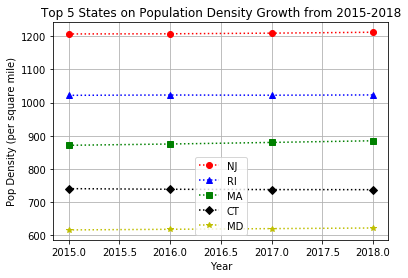

In [202]:
fig, ax3 = plt.subplots()
#mouse count
ax3.errorbar(pop_density_df_T.index, pop_density_df_T.NJ, fmt="o:", color='r', label = 'NJ')
ax3.errorbar(pop_density_df_T.index, pop_density_df_T.RI, fmt="^:", color='b', label = 'RI')
ax3.errorbar(pop_density_df_T.index, pop_density_df_T.MA, fmt="s:", color='g', label = 'MA')
ax3.errorbar(pop_density_df_T.index, pop_density_df_T.CT, fmt="D:", color='black', label = 'CT')
ax3.errorbar(pop_density_df_T.index, pop_density_df_T.MD, fmt="*:", color='y', label = 'MD')

ax3.legend(loc="best")
# ax3.set_xlim(2014, 2019)
# ax3.set_ylim(400, 1500)
ax3.set_title("Top 5 States on Population Density Growth from 2015-2018")
ax3.set_xlabel("Year")
ax3.set_ylabel("Pop Density (per square mile)")
ax3.grid()


# Save the Figure
plt.savefig('Top 5 States on Population Density Growth.png')

plt.show()

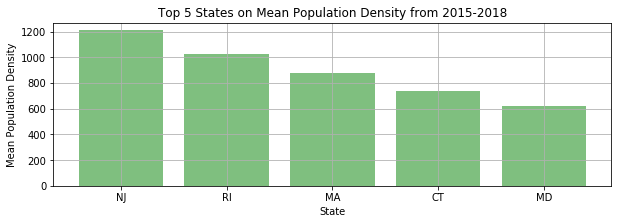

In [224]:
x_axis = np.arange(len(States_popDensity_Top5means_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(x_axis, States_popDensity_Top5means_df.Pop_Den_Mean, color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, States_popDensity_Top5means_df.index, rotation="horizontal")

# Set a Title and labels
plt.title("Top 5 States on Mean Population Density from 2015-2018")
plt.xlabel("State")
plt.ylabel("Mean Population Density")

plt.savefig('Top 5 States on Mean Population Density Bar.png')

plt.grid()

# Bee Dataset

In [203]:
bees_df.head()

,State,Colonies,Lost_Colonies,Year,Lost_Unknown,Percent_loss
0,Alabama,2303,765,2015,521.19,33.22
1,Alabama,367,128,2016,506.17,34.88
2,Alabama,1776,819,2017,258.70,46.11
3,Alabama,2303,742,2018,228.40,32.22
4,Arizona,176,114,2016,1409.70,64.77


In [204]:
bees2015_df = bees_df[(bees_df['Year']==2015)]
bees2015_df = bees2015_df.sort_values(by=["State"]).reset_index(drop=True)

bees2016_df = bees_df[(bees_df['Year']==2016)]
bees2016_df = bees2016_df.sort_values(by=["State"]).reset_index(drop=True)

bees2017_df = bees_df[(bees_df['Year']==2017)]
bees2017_df = bees2017_df.sort_values(by=["State"]).reset_index(drop=True)

bees2018_df = bees_df[(bees_df['Year']==2018)]
bees2018_df = bees2018_df.sort_values(by=["State"]).reset_index(drop=True)

In [205]:
bees2015_df = bees2015_df.drop(['Year', 'Lost_Unknown', 'Percent_loss'], axis=1)
bees2016_df = bees2016_df.drop(['Year', 'Lost_Unknown', 'Percent_loss'], axis=1)
bees2017_df = bees2017_df.drop(['Year', 'Lost_Unknown', 'Percent_loss'], axis=1)
bees2018_df = bees2018_df.drop(['Year', 'Lost_Unknown', 'Percent_loss'], axis=1)

In [206]:
#creating dataframe of Bees_loss
bees_colonies_df = pd.merge(bees2015_df, bees2016_df, on='State')
bees_colonies_df = bees_colonies_df.rename(columns={"Colonies_x": "Colonies_2015",
                                                    "Lost_Colonies_x": "Lost_Colonies_2015",
                                                    "Colonies_y": "Colonies_2016",
                                                   "Lost_Colonies_y": "Lost_Colonies_2016",})

bees_colonies_df = pd.merge(bees_colonies_df, bees2017_df, on='State')
bees_colonies_df = bees_colonies_df.rename(columns={"Colonies": "Colonies_2017",
                                                    "Lost_Colonies": "Lost_Colonies_2017"})

bees_colonies_df = pd.merge(bees_colonies_df, bees2018_df, on='State')
bees_colonies_df = bees_colonies_df.rename(columns={"Colonies": "Colonies_2018",
                                                    "Lost_Colonies": "Lost_Colonies_2018"})
bees_colonies_df.head()

,State,Colonies_2015,Lost_Colonies_2015,Colonies_2016,Lost_Colonies_2016,Colonies_2017,Lost_Colonies_2017,Colonies_2018,Lost_Colonies_2018
0,Alabama,2303,765,367,128,1776,819,2303,742
1,Arkansas,586,234,1940,770,3953,1858,586,234
2,California,300959,119782,246959,75322,141770,48769,300959,119782
3,Colorado,3394,984,448,216,3634,839,3394,984
4,Connecticut,111,44,345,213,448,327,111,44


In [207]:
bees_lost_colonies_df = pd.DataFrame()
bees_lost_colonies_df['State'] = bees_colonies_df.State
bees_lost_colonies_df['2015'] = bees_colonies_df.Lost_Colonies_2015
bees_lost_colonies_df['2016'] = bees_colonies_df.Lost_Colonies_2016
bees_lost_colonies_df['2017'] = bees_colonies_df.Lost_Colonies_2017
bees_lost_colonies_df['2018'] = bees_colonies_df.Lost_Colonies_2018
bees_lost_colonies_df.head()

,State,2015,2016,2017,2018
0,Alabama,765,128,819,742
1,Arkansas,234,770,1858,234
2,California,119782,75322,48769,119782
3,Colorado,984,216,839,984
4,Connecticut,44,213,327,44


In [208]:
bees_lost_colonies_df = pd.merge(abbr_name_df, bees_lost_colonies_df, on='State')
bees_lost_colonies_df = bees_lost_colonies_df.drop(['State'], axis =1)
bees_lost_colonies_df.head()

,State_Abb,2015,2016,2017,2018
0,AL,765,128,819,742
1,AR,234,770,1858,234
2,CA,119782,75322,48769,119782
3,CO,984,216,839,984
4,CT,44,213,327,44


In [209]:
bees_lost_colonies_df2= bees_lost_colonies_df.set_index('State_Abb')
bees_lost_colonies_df_T = bees_lost_colonies_df2.T
bees_lost_colonies_df_T.head()

State_Abb,AL,AR,CA,CO,CT,FL,GA,ID,IL,IN,...,PA,SC,SD,TN,TX,UT,VT,VA,WA,WV
2015,765,234,119782,984,44,10126,5628,28392,508,6017,...,2427,2442,25393,540,55215,905,440,1699,24848,175
2016,128,770,75322,216,213,13485,7848,14000,276,219,...,4194,1196,6338,349,14745,895,567,829,19646,167
2017,819,1858,48769,839,327,7065,3200,4748,718,2187,...,2699,801,12043,1732,13647,338,531,2686,11885,851
2018,742,234,119782,984,44,10126,5628,28392,508,6017,...,2427,2442,25393,540,55215,905,440,1699,24848,175


In [210]:
bees_lost_colonies_sum=bees_lost_colonies_df_T.sum()
bees_lost_colonies_sum_df=pd.DataFrame(bees_lost_colonies_sum)
bees_lost_colonies_sum_df = bees_lost_colonies_sum_df.rename(columns={0:"Total_Lost_Colonies"})
bees_lost_colonies_sum_df = bees_lost_colonies_sum_df.sort_values(by=["Total_Lost_Colonies"], ascending=False)
bees_lost_colonies_Top5sum_df = bees_lost_colonies_sum_df.head(5)
bees_lost_colonies_Top5sum_df

,Total_Lost_Colonies
State_Abb,
CA,363655
ND,178566
TX,138822
WA,81227
ID,75532


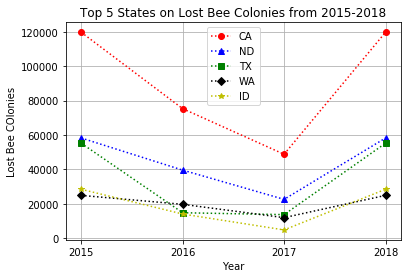

In [234]:
fig, ax4 = plt.subplots()
#mouse count
ax4.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.CA, fmt="o:", color='r', label = 'CA')
ax4.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.ND, fmt="^:", color='b', label = 'ND')
ax4.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.TX, fmt="s:", color='g', label = 'TX')
ax4.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.WA, fmt="D:", color='black', label = 'WA')
ax4.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.ID, fmt="*:", color='y', label = 'ID')

ax4.legend(loc="best")
# ax4.set_xlim(2014, 2019)
# ax4.set_ylim(0, 150000)
ax4.set_title("Top 5 States on Lost Bee Colonies from 2015-2018")
ax4.set_xlabel("Year")
ax4.set_ylabel("Lost Bee COlonies")
ax4.grid()


# Save the Figure
plt.savefig('Top 5 States on Lost Bee Colonies from 2015-2018.png')

plt.show()

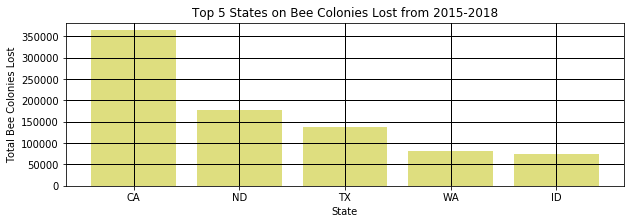

In [222]:
x_axis = np.arange(len(bees_lost_colonies_Top5sum_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(x_axis, bees_lost_colonies_Top5sum_df.Total_Lost_Colonies, color='y', alpha=0.5, align="edge")
plt.xticks(tick_locations, bees_lost_colonies_Top5sum_df.index, rotation="horizontal")

# Set a Title and labels
plt.title("Top 5 States on Bee Colonies Lost from 2015-2018")
plt.xlabel("State")
plt.ylabel("Total Bee Colonies Lost")

plt.savefig('Top 5 States on Bee Colonies Lost Bar.png')

plt.grid(color='black', linestyle='-', linewidth=1)

# Relational Graphs

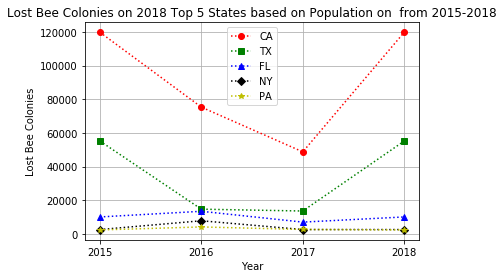

In [214]:
fig, ax8 = plt.subplots()

ax8.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.CA, fmt="o:", color='r', label = 'CA')
ax8.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.TX, fmt="s:", color='g', label = 'TX')
ax8.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.FL, fmt="^:", color='b', label = 'FL')
ax8.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.NY, fmt="D:", color='black', label = 'NY')
ax8.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.PA, fmt="*:", color='y', label = 'PA')

ax8.legend(loc="best")
# ax4.set_xlim(2014, 2019)
# ax4.set_ylim(0, 150000)
ax8.set_title("Lost Bee Colonies on 2018 Top 5 States based on Population on  from 2015-2018")
ax8.set_xlabel("Year")
ax8.set_ylabel("Lost Bee Colonies")
ax8.grid()


# Save the Figure
plt.savefig('Lost Bee Colonies on Top 5 States based on Population.png')

plt.show()

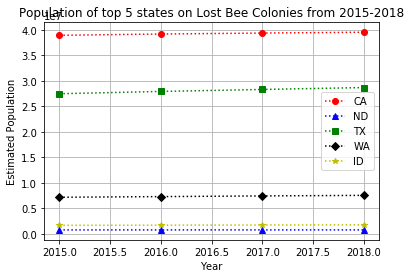

In [215]:
fig, ax8 = plt.subplots()
#mouse count
ax8.errorbar(pop_est_df_T.index, pop_est_df_T.CA, fmt="o:", color='r', label = 'CA')
ax8.errorbar(pop_est_df_T.index, pop_est_df_T.ND, fmt="^:", color='b', label = 'ND')
ax8.errorbar(pop_est_df_T.index, pop_est_df_T.TX, fmt="s:", color='g', label = 'TX')
ax8.errorbar(pop_est_df_T.index, pop_est_df_T.WA, fmt="D:", color='black', label = 'WA')
ax8.errorbar(pop_est_df_T.index, pop_est_df_T.ID, fmt="*:", color='y', label = 'ID')

ax8.legend(loc="best")
# ax8.set_xlim(2014, 2019)
# ax8.set_ylim(400, 1500)
ax8.set_title("Population of top 5 states on Lost Bee Colonies from 2015-2018")
ax8.set_xlabel("Year")
ax8.set_ylabel("Estimated Population")
ax8.grid()


# Save the Figure
plt.savefig('Population of top 5 states on Lost Bee Colonies.png')

plt.show()

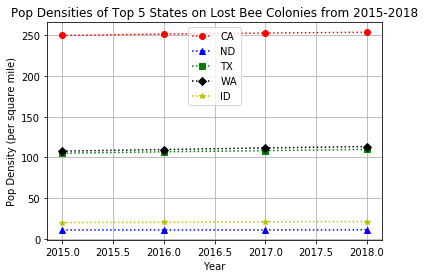

In [216]:
fig, ax5 = plt.subplots()
#mouse count
ax5.errorbar(pop_density_df_T.index, pop_density_df_T.CA, fmt="o:", color='r', label = 'CA')
ax5.errorbar(pop_density_df_T.index, pop_density_df_T.ND, fmt="^:", color='b', label = 'ND')
ax5.errorbar(pop_density_df_T.index, pop_density_df_T.TX, fmt="s:", color='g', label = 'TX')
ax5.errorbar(pop_density_df_T.index, pop_density_df_T.WA, fmt="D:", color='black', label = 'WA')
ax5.errorbar(pop_density_df_T.index, pop_density_df_T.ID, fmt="*:", color='y', label = 'ID')

ax5.legend(loc="best")
# ax5.set_xlim(2014, 2019)
# ax5.set_ylim(400, 1500)
ax5.set_title("Pop Densities of Top 5 States on Lost Bee Colonies from 2015-2018")
ax5.set_xlabel("Year")
ax5.set_ylabel("Pop Density (per square mile)")
ax5.grid()


# Save the Figure
plt.savefig('Population Densities of Top 5 States on Lost Bee Colonies plot.png')

plt.show()

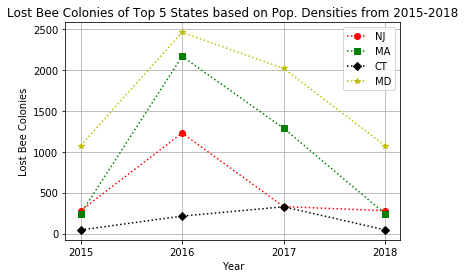

In [217]:
fig, ax6 = plt.subplots()
#mouse count
ax6.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.NJ, fmt="o:", color='r', label = 'NJ')
# ax6.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.RI, fmt="^:", color='b', label = 'RI')
ax6.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.MA, fmt="s:", color='g', label = 'MA')
ax6.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.CT, fmt="D:", color='black', label = 'CT')
ax6.errorbar(bees_lost_colonies_df_T.index, bees_lost_colonies_df_T.MD, fmt="*:", color='y', label = 'MD')

ax6.legend(loc="best")
# ax4.set_xlim(2014, 2019)
# ax4.set_ylim(0, 150000)
ax6.set_title("Lost Bee Colonies of Top 5 States based on Pop. Densities from 2015-2018")
ax6.set_xlabel("Year")
ax6.set_ylabel("Lost Bee Colonies")
ax6.grid()


# Save the Figure
plt.savefig('Lost Bee Colonies of Top 5 States on Population Densities plot.png')

plt.show()

In [263]:
bee_loss_df = bee_loss_df.set_index('State_Abb')
bee_loss_df.head()

,Colonies,Lost Colonies,Percent_loss
State_Abb,,,
AL,1650,718.922,43.58
AK,2672,800.247,38.88
AZ,10187,3366.149,36.00
AR,1067661,409099.327,36.33
CA,88720,29167.609,38.63


In [267]:
States_popDensity_means_df.drop('loss')

KeyError: "['loss'] not found in axis"

In [257]:
States_popDensity_means_df["loss"] = bee_loss_df["Percent_loss"]

pop1 = States_popDensity_means_df.head(25)["loss"]
pop2 = States_popDensity_means_df.tail(25)["loss"]
States_popDensity_means_df.head()
bee_loss_df.head()

,State,Colonies,Lost Colonies,Percent_loss,Unnamed: 4
0,Alabama,1650,718.922,43.58,NaN
1,Arizona,2672,800.247,38.88,NaN
2,Arkansas,10187,3366.149,36.00,NaN
3,California,1067661,409099.327,36.33,NaN
4,Colorado,88720,29167.609,38.63,NaN


In [265]:
States_popDensity_means_df_merged = pd.merge(bee_loss_df, States_popDensity_means_df)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

# Independent T-test

In [230]:
#Population Density vs. Bees Lost Colonies
stats.ttest_ind(States_popDensity_means_df.loc[50].Pop_Den_Mean, bees_lost_colonies_sum_df.Total_Lost_Colonies, equal_var=False)

Ttest_indResult(statistic=-3.078587625343925, pvalue=0.0037977370859850145)

In [232]:
#Population vs. Bees Lost Colonies
stats.ttest_ind(pop_est_df2[2018], bees_lost_colonies_sum_df.Total_Lost_Colonies, equal_var=False)

Ttest_indResult(statistic=6.231424035167747, pvalue=1.0276427151586875e-07)

In [241]:
(t_stat,p) = stats.ttest_ind(pop1,pop2,equal_var=False)
print(p)

3.21009902995104e-05


In [240]:
if p < 0.05:
    print("the difference in the means is significant")

the difference in the means is significant
